In [41]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [42]:
# bring in csv files
food_security_hh = "data/data-EFK41.csv"
obesity_file = "data/data-xeuft.csv"
grand_food_security_file = "data/data-XVKxd.csv"

food_security_df = pd.read_csv(food_security_hh)
obesity_df = pd.read_csv(obesity_file)
grand_food_security_df = pd.read_csv(grand_food_security_file)

# Need to split the county/state to be able to merge then narrow the dataframes
# Splitting Columns - https://sparkbyexamples.com/pandas/pandas-split-column/#:~:text=the%20split()%20function%20is,Dataframe%20columns%2C%20whereas%20the%20Series.
# How to rename the column - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/
food_security_df[['County', 'State']] = food_security_df.NAME_E.str.split(",", expand = True)
obesity_df[['County', 'State']] = obesity_df.Geography.str.split(",", expand = True)

# Rename the one column for easier manipulation
grand_food_security_df.rename(columns = {'County, State':'county_state'}, inplace = True)
grand_food_security_df[['County', 'State']] = grand_food_security_df.county_state.str.split(",", expand = True)

# Dropping all unneeded columns
food_security_df.drop(columns=['NAME_E'],inplace=True, axis=1)
obesity_df.drop(columns=['FIPS', 'Column 1.1','Column 1.2','Column 1.3','Adult Obesity (2017)','Adult Obesity (2016)','Adult Obesity (2015)','Adult Obesity (2014)','Geography'],inplace=True, axis=1)
grand_food_security_df.drop(columns=['FIPS', 'county_state'],inplace=True, axis=1)


# Isolating all Georgia information
georgia_food_security_df = food_security_df.loc[food_security_df['State']==' Georgia']
ga_obesity_df = obesity_df.loc[obesity_df['State']==' GA']
georgia_grand_food_security_df = grand_food_security_df.loc[grand_food_security_df['State']==' Georgia']

# Replacing Georgia with GA for merging purposes
ga_food_security_df=georgia_food_security_df.replace(' Georgia',' GA')
ga_grand_food_security_df=georgia_grand_food_security_df.replace(' Georgia',' GA')

#Merging the dfs one by one
food_security_pt1 = pd.merge(ga_food_security_df, ga_obesity_df, how = "inner", on=["State", "County"])
ga_food_security_complete = pd.merge(ga_food_security_df, ga_grand_food_security_df, how = "inner", on=["State", "County"])
ga_food_security_complete.head()

,Households,Food Security Rate,Food Insecurity Rate_x,Region,Median HH income,County,State,Food Insecurity Rate_y,2018 Food Insecurity Rate,# of Food Insecure Persons in 2018,...,High Threshold Type,% FI ≤ Low Threshold,% FI Btwn Thresholds,% FI &gt; High Threshold,2018 Child food insecurity rate,# of Food Insecure Children in 2018,% food insecure children in HH w/ HH incomes below 185 FPL in 2018,% food insecure children in HH w/ HH incomes above 185 FPL in 2018,2018 Cost Per Meal,2018 Weighted Annual Food Budget Shortfall
0,6682.0,84.3,15.7,South,39561.0,Appling County,GA,15.7,0.16,2900.0,...,Other Nutrition Program,63.4%,18.3%,18.4%,21.9%,"1,010",94%,6%,$2.88,1414000
1,2785.0,84.2,15.8,South,34877.0,Atkinson County,GA,15.8,0.16,1300.0,...,Other Nutrition Program,64.7%,22.3%,13.0%,24.4%,550,88%,12%,$2.84,626000
2,3966.0,83.2,16.8,South,36964.0,Bacon County,GA,16.8,0.17,1880.0,...,Other Nutrition Program,55.8%,20.2%,24.0%,23.7%,680,86%,14%,$2.81,894000
3,1385.0,82.7,17.3,South,37188.0,Baker County,GA,17.3,0.17,550.0,...,Other Nutrition Program,53.9%,32.2%,13.9%,20.2%,130,73%,27%,$3.05,284000
4,16122.0,83.3,16.7,South,39426.0,Baldwin County,GA,16.7,0.17,7540.0,...,Other Nutrition Program,65.6%,8.4%,26.0%,22.9%,"2,000",57%,43%,$2.82,3598000


In [43]:
# Rename and drop Fields and copy the existing df to new df --jinny

ga_food_security_complete.rename(columns={
'Households': '#_Households_Per_County',
 'Food Security Rate': 'Food_Security_Rate',
'Food Insecurity Rate_x': 'Food_Insecurity_Rate',
'Region': 'Region',
'Median HH income': 'Median_HH_income',
'County': 'County',
'State': 'State',
'Food Insecurity Rate_y': 'Food_Insecurity_Rate_y',
'2018 Food Insecurity Rate': '2018_Food_Insecurity_Rate',
'# of Food Insecure Persons in 2018': '#_of_Food_ Insecure_ Persons',
'...': '...',
'High Threshold Type': 'High_Threshold_Type',
'% FI ≤ Low Threshold': '%_FI_≤_Low_Threshold',
'% FI Btwn Thresholds': '%_FI_Btwn_Thresholds',
'% FI &gt; High Threshold': '%_FI_&gt_High_Threshold',
'2018 Child food insecurity rate': '2018_Child_food_insecurity_rate',
'# of Food Insecure Children in 2018': '#_of_Food_Insecure_Children_in_2018',
'% food insecure children in HH w/ HH incomes below 185 FPL in 2018': '%_food_insecure_children_in_HH_w/HH_incomes_below_185_FPL_in_2018',
'% food insecure children in HH w/ HH incomes above 185 FPL in 2018': '%_food_insecure_children_in_HH_w/HH_incomes_above_185_FPL_in_2018',
'2018 Cost Per Meal': '2018_Cost_Per_Meal',
'2018 Weighted Annual Food Budget Shortfall': '2018_Weighted_Annual_Food_Budget_Shortfall'
}, inplace=True)   
ga_food_security_complete.head()

,#_Households_Per_County,Food_Security_Rate,Food_Insecurity_Rate,Region,Median_HH_income,County,State,Food_Insecurity_Rate_y,2018_Food_Insecurity_Rate,#_of_Food_ Insecure_ Persons,...,High_Threshold_Type,%_FI_≤_Low_Threshold,%_FI_Btwn_Thresholds,%_FI_&gt_High_Threshold,2018_Child_food_insecurity_rate,#_of_Food_Insecure_Children_in_2018,%_food_insecure_children_in_HH_w/HH_incomes_below_185_FPL_in_2018,%_food_insecure_children_in_HH_w/HH_incomes_above_185_FPL_in_2018,2018_Cost_Per_Meal,2018_Weighted_Annual_Food_Budget_Shortfall
0,6682.0,84.3,15.7,South,39561.0,Appling County,GA,15.7,0.16,2900.0,...,Other Nutrition Program,63.4%,18.3%,18.4%,21.9%,"1,010",94%,6%,$2.88,1414000
1,2785.0,84.2,15.8,South,34877.0,Atkinson County,GA,15.8,0.16,1300.0,...,Other Nutrition Program,64.7%,22.3%,13.0%,24.4%,550,88%,12%,$2.84,626000
2,3966.0,83.2,16.8,South,36964.0,Bacon County,GA,16.8,0.17,1880.0,...,Other Nutrition Program,55.8%,20.2%,24.0%,23.7%,680,86%,14%,$2.81,894000
3,1385.0,82.7,17.3,South,37188.0,Baker County,GA,17.3,0.17,550.0,...,Other Nutrition Program,53.9%,32.2%,13.9%,20.2%,130,73%,27%,$3.05,284000
4,16122.0,83.3,16.7,South,39426.0,Baldwin County,GA,16.7,0.17,7540.0,...,Other Nutrition Program,65.6%,8.4%,26.0%,22.9%,"2,000",57%,43%,$2.82,3598000


In [45]:
# drop tthe columns ()'Region','Food Insecurity Rate_y','2018 Food Insecurity Rate') and rename the df 
#df.drop(["Courses", "Fee"], axis = 1, inplace=True)
ga_food_security_main = ga_food_security_complete.drop(["Region", "Food_Insecurity_Rate_y", "2018_Food_Insecurity_Rate"], axis=1) 

ga_food_security_main.to_csv("data\consolidated_food_security_data.csv")
ga_food_security_main

,#_Households_Per_County,Food_Security_Rate,Food_Insecurity_Rate,Median_HH_income,County,State,#_of_Food_ Insecure_ Persons,Low Threshold in state,Low Threshold Type,High Threshold in state,High_Threshold_Type,%_FI_≤_Low_Threshold,%_FI_Btwn_Thresholds,%_FI_&gt_High_Threshold,2018_Child_food_insecurity_rate,#_of_Food_Insecure_Children_in_2018,%_food_insecure_children_in_HH_w/HH_incomes_below_185_FPL_in_2018,%_food_insecure_children_in_HH_w/HH_incomes_above_185_FPL_in_2018,2018_Cost_Per_Meal,2018_Weighted_Annual_Food_Budget_Shortfall
0,6682.0,84.3,15.7,39561.0,Appling County,GA,2900.0,130%,SNAP,185%,Other Nutrition Program,63.4%,18.3%,18.4%,21.9%,"1,010",94%,6%,$2.88,1414000
1,2785.0,84.2,15.8,34877.0,Atkinson County,GA,1300.0,130%,SNAP,185%,Other Nutrition Program,64.7%,22.3%,13.0%,24.4%,550,88%,12%,$2.84,626000
2,3966.0,83.2,16.8,36964.0,Bacon County,GA,1880.0,130%,SNAP,185%,Other Nutrition Program,55.8%,20.2%,24.0%,23.7%,680,86%,14%,$2.81,894000
3,1385.0,82.7,17.3,37188.0,Baker County,GA,550.0,130%,SNAP,185%,Other Nutrition Program,53.9%,32.2%,13.9%,20.2%,130,73%,27%,$3.05,284000
4,16122.0,83.3,16.7,39426.0,Baldwin County,GA,7540.0,130%,SNAP,185%,Other Nutrition Program,65.6%,8.4%,26.0%,22.9%,"2,000",57%,43%,$2.82,3598000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,36043.0,88.3,11.7,46970.0,Whitfield County,GA,12170.0,130%,SNAP,185%,Other Nutrition Program,47.7%,40.4%,12.0%,15.4%,"4,220",100%,0%,$2.88,5935000
155,2606.0,84.6,15.4,36077.0,Wilcox County,GA,1360.0,130%,SNAP,185%,Other Nutrition Program,45.4%,19.8%,34.8%,21.5%,360,84%,16%,$3.00,691000
156,3879.0,83.2,16.8,35106.0,Wilkes County,GA,1660.0,130%,SNAP,185%,Other Nutrition Program,63.3%,20.1%,16.6%,26.1%,540,66%,35%,$3.36,943000
157,3237.0,83.9,16.1,37583.0,Wilkinson County,GA,1470.0,130%,SNAP,185%,Other Nutrition Program,58.8%,13.0%,28.2%,23.1%,480,63%,37%,$2.96,736000


In [5]:
# Visualize one thing and make the data  availble in the dataFrame --jinny

In [6]:
# Separate out the state and county columns


In [7]:
# Rename Columns

In [8]:
# Get rid of what is not related to GA

In [9]:
# Merge by Counties

In [10]:
# Sahmirah's Visual Block

In [11]:
# Sahmirah's Visual Block 2

In [12]:
# Sahmirah's Visual Block 3

In [13]:
# Kendall's Visual Block

In [14]:
# Kendall's Visual Block 1

In [15]:
# Kendall's Visual Block 2

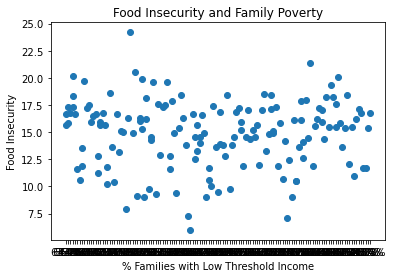

In [46]:
# Bobby's Visual Block
low_threshold_income_rate = ga_food_security_main["%_FI_≤_Low_Threshold"]
food_insecurity_rate = ga_food_security_main["Food_Insecurity_Rate"]

plt.scatter(low_threshold_income_rate,food_insecurity_rate)
plt.xlabel('% Families with Low Threshold Income')
plt.ylabel('Food Insecurity')
plt.title('Food Insecurity and Family Poverty')
plt.show()

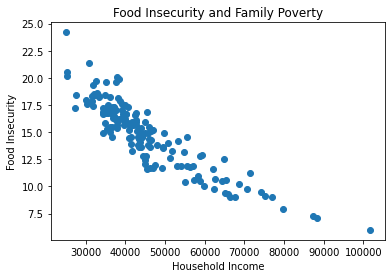

In [49]:
# Bobby's Visual Block 1 
hh_income = ga_food_security_main["Median_HH_income"]

plt.scatter(hh_income,food_insecurity_rate)
plt.xlabel('Household Income')
plt.ylabel('Food Insecurity')
plt.title('Food Insecurity and Family Poverty')
plt.show()

In [18]:
# Bobby's Visual Block 2